# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

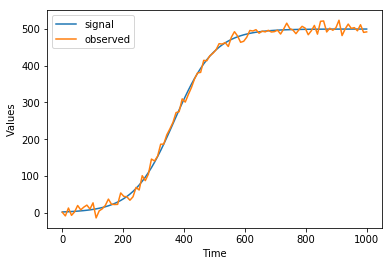

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     3       0:00.0 -inf          1             
0     4       0:00.0 -inf          1             
0     5       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0     241    

c:\users\bclamber\desktop\pints\pints\_log_likelihoods.py:480: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1440  2542    0:01.6 -252.8697658  0.485994398   
1460  2607    0:01.7 -243.4664543  0.48074309    
1480  2654    0:01.7 -230.2482379  0.479591837   
1500  2700    0:01.8 -220.8766511  0.478695652   
1520  2731    0:01.8 -211.9046761  0.480909481   
1540  2789    0:01.8 -204.3194436  0.477605693   
1560  2825    0:01.8 -194.8469231  0.478762887   
1580  2864    0:01.9 -185.9583575  0.479301948   
1600  2915    0:02.0 -179.3877047  0.477534791   
1620  2945    0:02.0 -173.0081281  0.479764244   
1640  3000    0:02.0 -166.8089854  0.477307692   
1660  3043    0:02.1 -159.1502413  0.477109345   
1680  3100    0:02.1 -152.5018344  0.474444444   
1700  3139    0:02.1 -147.9645479  0.474990873   
1720  3183    0:02.2 -142.6072982  0.474667625   
1740  3219    0:02.2 -138.7611314  0.475700603   
1760  3273    0:02.2 -132.8730841  0.473720849   
1780  3325    0:02.3 -128.0429499  0.472136752   
1800  3381    0:02.3 -124.7543469  0.469976517947
1820  3433    0:02.3 -122.3385661  0.468513023   


4840  8437    0:07.0 -3.223811419  0.552569367   
4860  8466    0:07.1 -3.105844281  0.553062237   
4880  8493    0:07.1 -2.991523457  0.553688373   
4900  8522    0:07.1 -2.880332745  0.554173849   
4920  8546    0:07.1 -2.771842281  0.554996317   
4940  8580    0:07.2 -2.664365517  0.555134474   
4960  8609    0:07.2 -2.560787233  0.555609697   
4980  8638    0:07.2 -2.461807051  0.556081573   
5000  8667    0:07.3 -2.367193559  0.556550139   
5020  8691    0:07.3 -2.327134254  0.557351345   
5040  8716    0:07.3 -2.237232203  0.558080808   
5060  8741    0:07.3 -2.149517523  0.558805899   
5080  8766    0:07.4 -2.064129371  0.559526656   
5100  8793    0:07.4 -1.981107835  0.560109615   
5120  8821    0:07.4 -1.900575835  0.560622254   
5140  8846    0:07.4 -1.82256306   0.561330807   
5160  8873    0:07.5 -1.747023194  0.561902514   
5180  8904    0:07.5 -1.673341706  0.562206021   
5200  8927    0:07.6 -1.601497509  0.563035065   
5220  8953    0:07.6 -1.531942757  0.563661873027


## Plot posterior samples versus true parameter values (dashed lines)

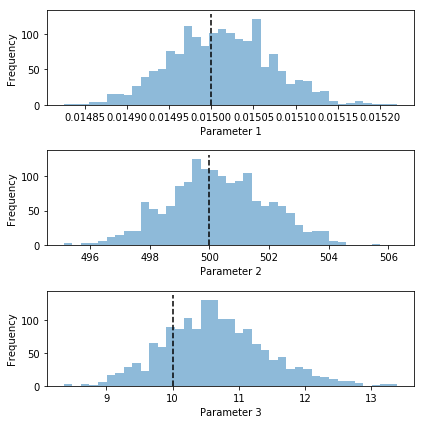

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

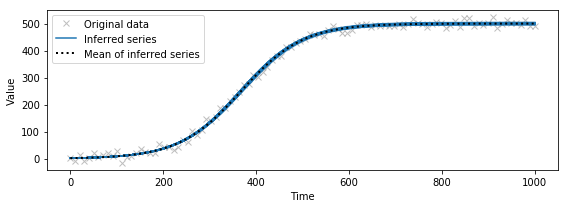

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -388.389626241 ± 0.0796540662066


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1638.23714121
